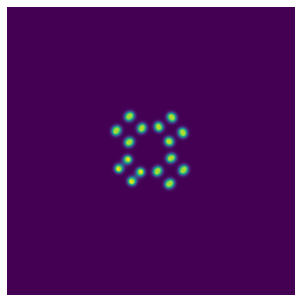

In [3]:
# -----------------------------------------------------------------------------
# From Numpy to Python
# Copyright (2017) Nicolas P. Rougier - BSD license
# More information at https://github.com/rougier/numpy-book
#
# https://github.com/rougier/numpy-tutorial/blob/master/README.rst
#    
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Parameters from http://www.aliensaint.com/uo/java/rd/
# -----------------------------------------------------
n = 256
Du, Dv, F, k = 0.16, 0.08, 0.035, 0.065  # Bacteria 1
# Du, Dv, F, k = 0.14, 0.06, 0.035, 0.065  # Bacteria 2
# Du, Dv, F, k = 0.16, 0.08, 0.060, 0.062  # Coral
# Du, Dv, F, k = 0.19, 0.05, 0.060, 0.062  # Fingerprint
# Du, Dv, F, k = 0.10, 0.10, 0.018, 0.050  # Spirals
# Du, Dv, F, k = 0.12, 0.08, 0.020, 0.050  # Spirals Dense
# Du, Dv, F, k = 0.10, 0.16, 0.020, 0.050  # Spirals Fast
# Du, Dv, F, k = 0.16, 0.08, 0.020, 0.055  # Unstable
# Du, Dv, F, k = 0.16, 0.08, 0.050, 0.065  # Worms 1
# Du, Dv, F, k = 0.16, 0.08, 0.054, 0.063  # Worms 2
# Du, Dv, F, k = 0.16, 0.08, 0.035, 0.060  # Zebrafish


Z = np.zeros((n+2, n+2), [('U', np.double),
                          ('V', np.double)])
U, V = Z['U'], Z['V']
u, v = U[1:-1, 1:-1], V[1:-1, 1:-1]

r = 20
u[...] = 1.0
U[n//2-r:n//2+r, n//2-r:n//2+r] = 0.50
V[n//2-r:n//2+r, n//2-r:n//2+r] = 0.25
u += 0.05*np.random.uniform(-1, +1, (n, n))
v += 0.05*np.random.uniform(-1, +1, (n, n))


def update(frame):
    global U, V, u, v, im

    for i in range(10):
        Lu = (                  U[0:-2, 1:-1] +
              U[1:-1, 0:-2] - 4*U[1:-1, 1:-1] + U[1:-1, 2:] +
                                U[2:  , 1:-1])
        Lv = (                  V[0:-2, 1:-1] +
              V[1:-1, 0:-2] - 4*V[1:-1, 1:-1] + V[1:-1, 2:] +
                                V[2:  , 1:-1])
        uvv = u*v*v
        u += (Du*Lu - uvv + F*(1-u))
        v += (Dv*Lv + uvv - (F+k)*v)

    im.set_data(V)
    im.set_clim(vmin=V.min(), vmax=V.max())

fig = plt.figure(figsize=(4, 4))
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.viridis)
plt.xticks([]), plt.yticks([])
animation = FuncAnimation(fig, update, interval=10, frames=300)
animation.save('gray-scott-1.mp4', fps=40, dpi=80, bitrate=-1, codec="libx264",
               extra_args=['-pix_fmt', 'yuv420p'],
               metadata={'artist':'Nicolas P. Rougier'})
#plt.show()